<a href="https://www.kaggle.com/code/mosesmoncy/big-mart-sales-prediction?scriptVersionId=126865209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Data Dictionary:
We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
# as there are two datsets (training and testing), we first import training datset
a1=pd.read_csv('/kaggle/input/training-dataset/Train.csv')
a1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
a1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
a1.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
a1.shape

(8523, 12)

In [6]:
a1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
a1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
a1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
a1['Item_Weight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

In [10]:
a1['Outlet_Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

In [11]:
# we need to encode the categorical data before we fill the missing values
la=LabelEncoder()
cols=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
a1[cols]=a1[cols].apply(la.fit_transform)

In [12]:
a1.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [13]:
a1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
a1['Item_Weight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

In [15]:
a1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# filling the missing values in Item_Weight with mean()

a1['Item_Weight']=a1['Item_Weight'].fillna(a1['Item_Weight'].mean())

In [17]:
a1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
# splitting input and outputs

x_train=a1.iloc[:,:-1]
y_train=a1.iloc[:,-1]
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [19]:
x_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [20]:
# importing testing dataset

a2=pd.read_csv('/kaggle/input/testing-dataset/Test.csv')
a2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [21]:
a2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [22]:
a2.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [23]:
a2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [24]:
a2.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [25]:
# we need to encode the categorical data before we fill the missing values
la=LabelEncoder()
colsnew=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
a2[colsnew]=a2[colsnew].apply(la.fit_transform)

In [26]:
a2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,3,1,1


In [27]:
a2.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [28]:
a2.isna().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [29]:
# filling the missing values in Item_Weight with mean()

a2['Item_Weight']=a2['Item_Weight'].fillna(a2['Item_Weight'].mean())

In [30]:
a2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [31]:
# splitting testing data

x_test=a2

In [32]:
# model creation

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [33]:
y_pred

array([1880.83239884, 1135.77661611, 2315.34461872, ..., 1750.68207471,
       3118.29637324, 1136.69512206])

In [34]:
a1.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


# Implementing Decision Tree and Random Forest

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
tree=DecisionTreeRegressor()
forest=RandomForestRegressor()
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)
y_predtree=tree.predict(x_test)
y_predforest=forest.predict(x_test)

In [36]:
print("the prediction from decision tree is",y_predtree)
print("the prediction from random forest is",y_predforest)

the prediction from decision tree is [1577.946   511.3344  523.3188 ... 2756.412  6471.576  1649.8524]
the prediction from random forest is [1677.043672 1228.760532  762.14126  ... 1770.275646 4518.305224
 1490.52646 ]


<AxesSubplot:>

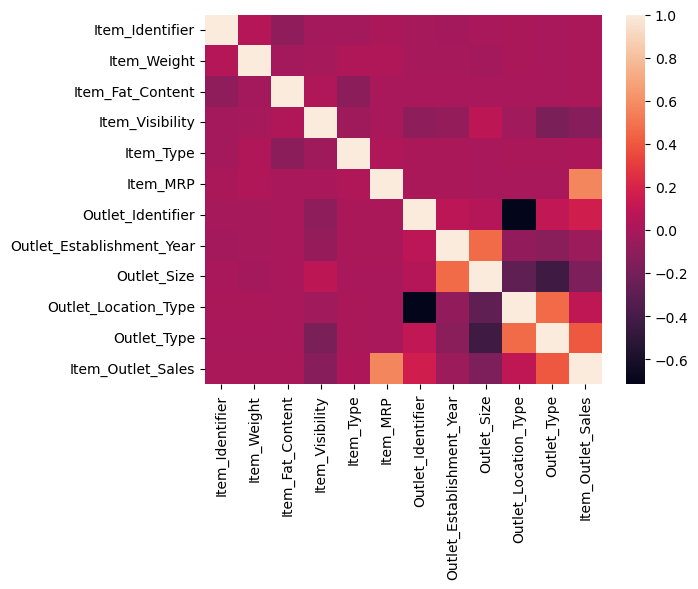

In [37]:
sns.heatmap(a1.corr())

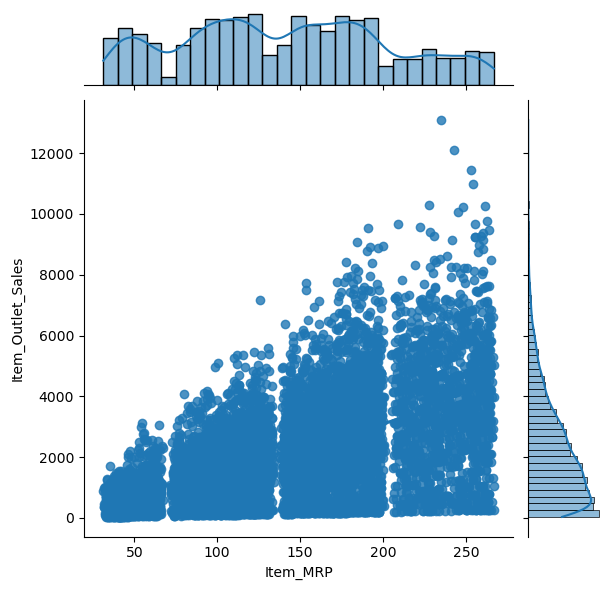

In [38]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=a1,kind='reg')

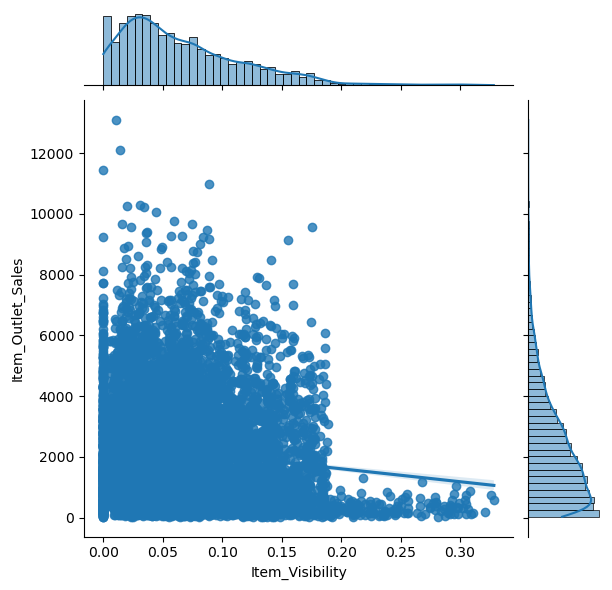

In [39]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=a1,kind='reg')

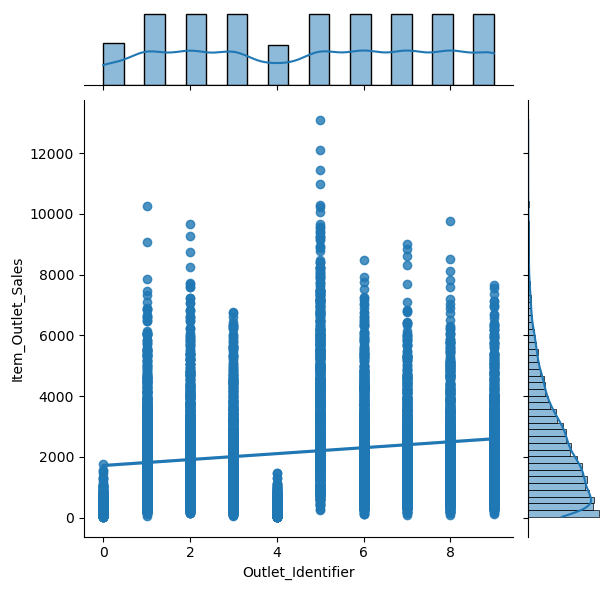

In [40]:
sns.jointplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=a1,kind='reg')

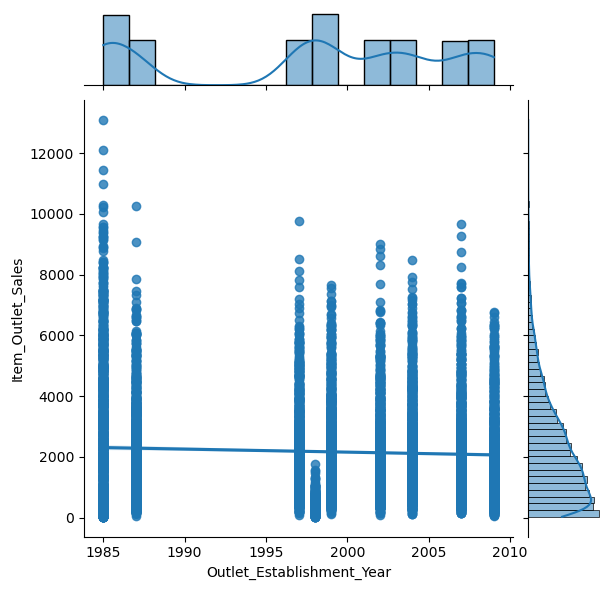

In [41]:
sns.jointplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=a1,kind='reg')


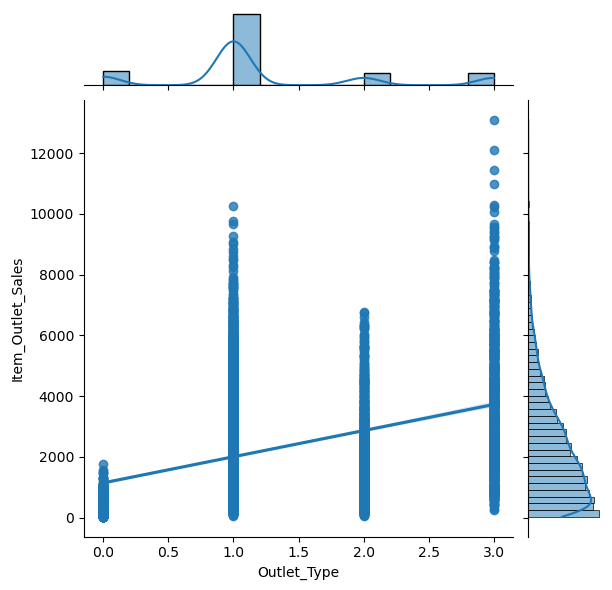

In [42]:
sns.jointplot(x='Outlet_Type',y='Item_Outlet_Sales',data=a1,kind='reg')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

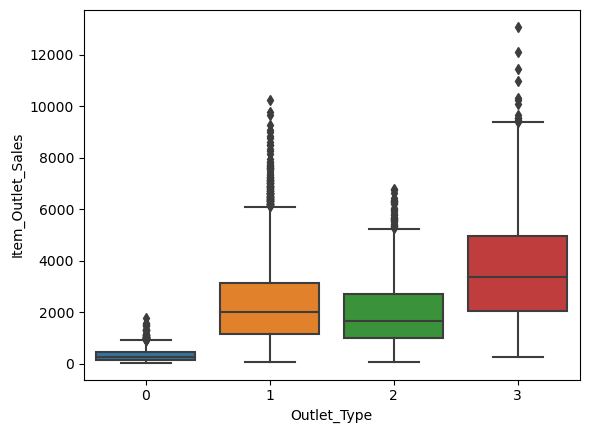

In [43]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=a1)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

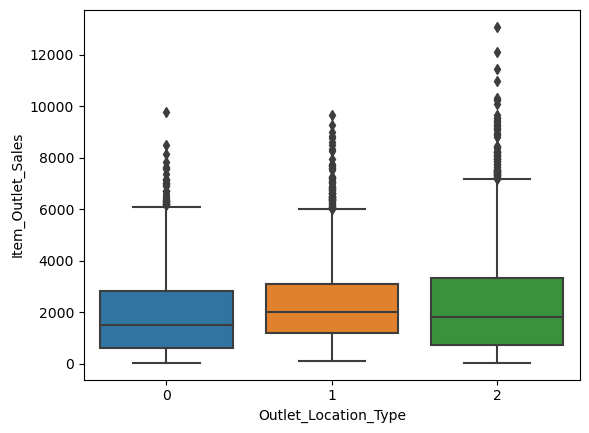

In [44]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=a1)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

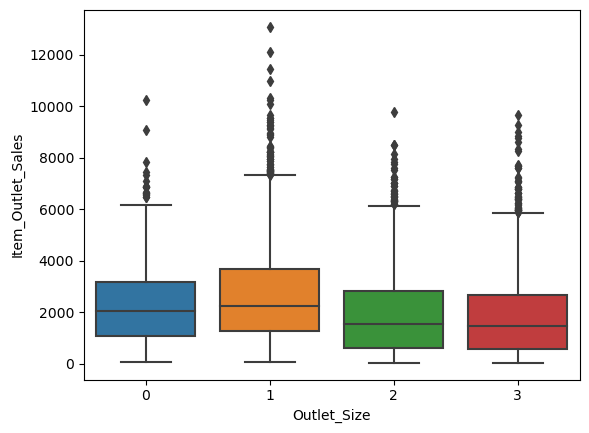

In [45]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=a1)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

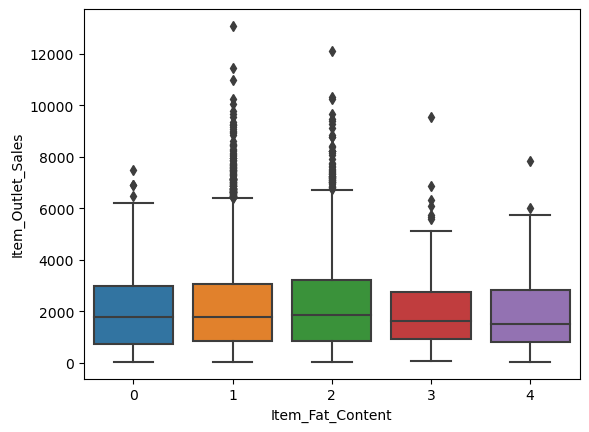

In [46]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=a1)